In [186]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [187]:
from Data.DatabaseConnection import DatabaseConnection
import pandas as pd
import matplotlib.pyplot as plt


In [188]:
dotenv_path = os.path.abspath("../.env")  
db = DatabaseConnection(dotenv_path)

In [189]:
Items = db.query("SELECT items.* from items join matches on items.match_id = matches.match_id WHERE matches.tft_set_number = 14")
Players = db.get_all_players()

In [190]:
items_df = pd.DataFrame(Items, columns=['id','match_id', 'puuid', 'character_id', 'item_id'])
PLayers_df = pd.DataFrame(Players, columns=['puuid', 'match_id', 'placement', 'level', 'gold_left', 'last_round', 'players_eilimnated','time_eliminated','total_damage','companion_id', 'tier', 'division','leaguepoints','wins', 'losses'])

In [191]:
items_df = items_df[items_df["match_id"] != 'EUN1_3784287010' ]
items_df = items_df[items_df["match_id"] != 'EUN1_3785454165' ]
items_df = items_df[items_df["match_id"] != 'EUN1_3785134625' ]
items_df = items_df[items_df["match_id"] != 'EUN1_3784302684' ]
items_df = items_df[items_df["match_id"] != 'EUN1_3785360005' ]

In [192]:
unique_items = pd.read_csv('../Notebooks/unique_items.csv')

In [193]:
print(unique_items)

                                 item_id item_pool       type    damage
0             TFT_Item_GuinsoosRageblade   default  offensive  physical
1             TFT_Item_MadredsBloodrazor   default  offensive    hybrid
2        TFT14_Item_ControllerEmblemItem    emblem        NaN       NaN
3                   TFT_Item_BrambleVest   default  defensive       NaN
4                   TFT_Item_DragonsClaw   default  defensive       NaN
..                                   ...       ...        ...       ...
140  TFT_Item_Artifact_InnervatingLocket  artifact  defensive       NaN
141                     TFT_Item_Chalice  artifact    utility       NaN
142      TFT5_Item_MorellonomiconRadiant   radiant  offensive   magical
143      TFT5_Item_NightHarvesterRadiant   radiant  defensive       NaN
144    TFT_Item_Artifact_SpectralCutlass  artifact  offensive  physical

[145 rows x 4 columns]


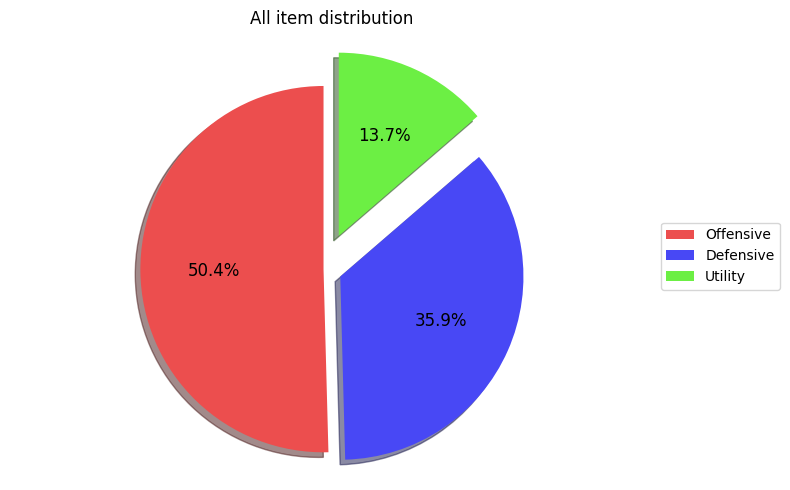

In [195]:
counts = unique_items["type"].value_counts()
labels = ['Offensive', 'Defensive','Utility']

plt.figure(figsize=(8, 5))
plt.pie(
    counts,
    autopct='%1.1f%%',
    explode=(0.0,0.1,0.2),
    startangle=90,
    textprops={'fontsize': 12},
    colors=("#ec4e4e", "#4848f5", "#6cef44"), 
    shadow=True, 
)
plt.title('All item distribution')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.tight_layout() 
plt.show()

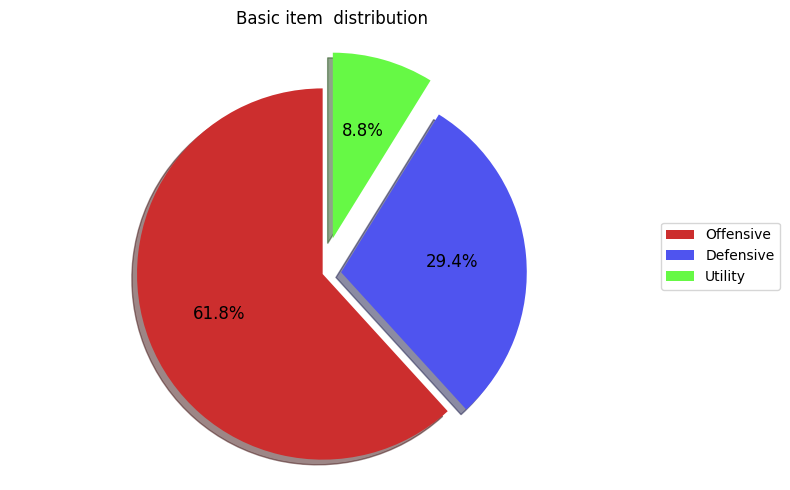

In [196]:
counts_default = unique_items[unique_items["item_pool"] == "default"]["type"].value_counts()
labels = ['Offensive', 'Defensive','Utility']

plt.figure(figsize=(8, 5))
plt.pie(
    counts_default,
    autopct='%1.1f%%',
    explode=(0.0,0.1,0.2),
    startangle=90,
    textprops={'fontsize': 12},
    colors=("#cc2e2e", "#4f54ef", "#66f945"), 
    shadow=True, 
)
plt.title('Basic item  distribution')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.tight_layout() 
plt.show()

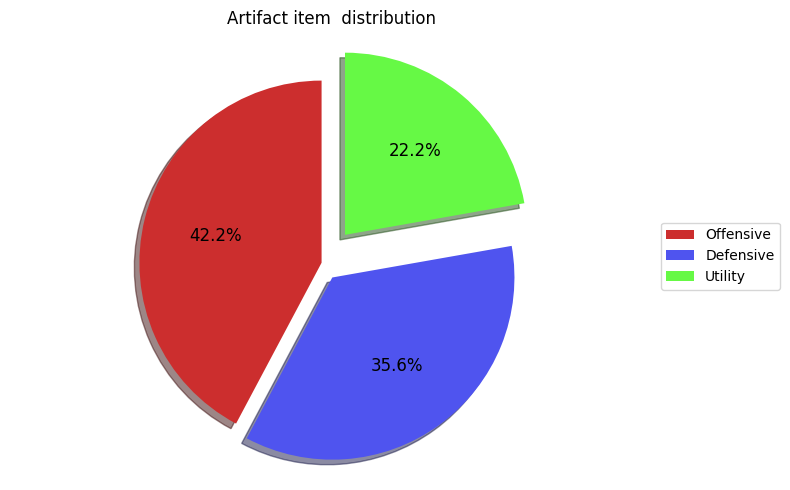

In [197]:
counts_artifacts = unique_items[unique_items["item_pool"] == "artifact"]["type"].value_counts()
labels = ['Offensive', 'Defensive','Utility']

plt.figure(figsize=(8, 5))
plt.pie(
    counts_artifacts,
    autopct='%1.1f%%',
    explode=(0.0,0.1,0.2),
    startangle=90,
    textprops={'fontsize': 12},
    colors=("#cc2e2e", "#4f54ef", "#66f945"), 
    shadow=True, 
)
plt.title('Artifact item  distribution')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.tight_layout() 
plt.show()

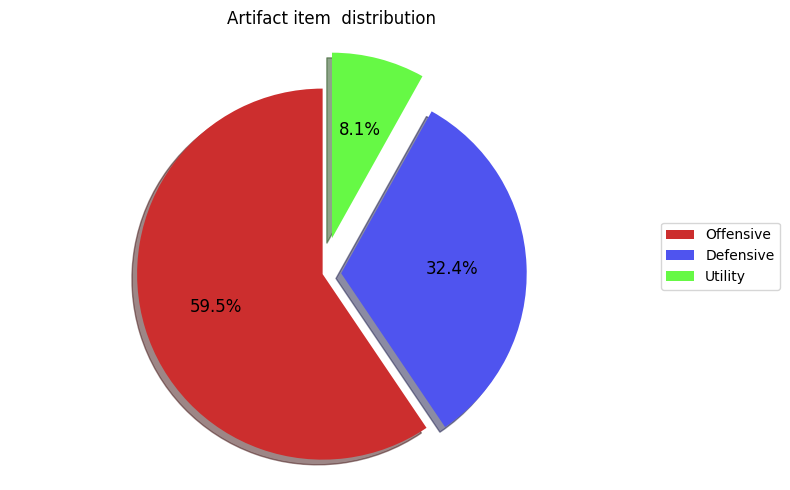

In [198]:
counts_radiant = unique_items[unique_items["item_pool"] == "radiant"]["type"].value_counts()
labels = ['Offensive', 'Defensive','Utility']

plt.figure(figsize=(8, 5))
plt.pie(
    counts_radiant,
    autopct='%1.1f%%',
    explode=(0.0,0.1,0.2),
    startangle=90,
    textprops={'fontsize': 12},
    colors=("#cc2e2e", "#4f54ef", "#66f945"), 
    shadow=True, 
)
plt.title('Artifact item  distribution')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.tight_layout() 
plt.show()

In [199]:
counts_dmg_type = unique_items[unique_items["type"] == "offensive"]["damage"].value_counts()
print(counts_dmg_type)

damage
magical     25
physical    22
hybrid      12
Name: count, dtype: int64


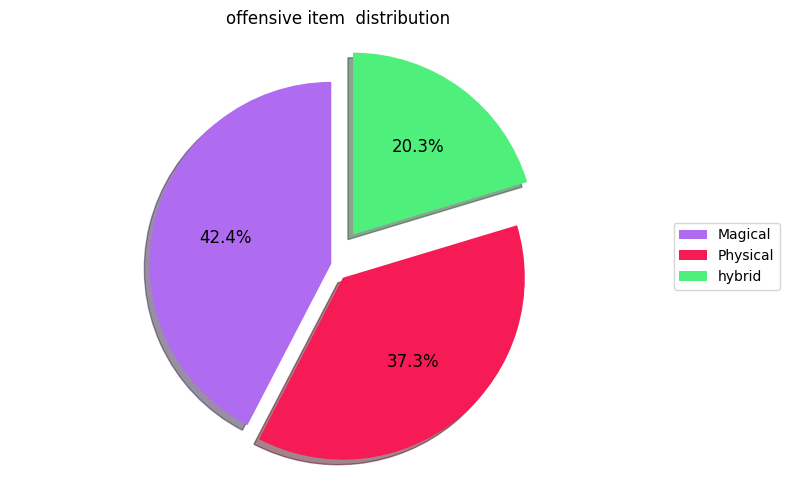

In [201]:
counts_dmg_type = unique_items[unique_items["type"] == "offensive"]["damage"].value_counts()
labels = ['Magical', 'Physical','hybrid']

plt.figure(figsize=(8, 5))
plt.pie(
    counts_dmg_type,
    autopct='%1.1f%%',
    explode=(0.0,0.1, 0.2),
    startangle=90,
    textprops={'fontsize': 12},
    colors=("#b06cf0", "#f61b55", "#4fef7c"), 
    shadow=True, 
)
plt.title('offensive item  distribution')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.tight_layout() 
plt.show()

In [202]:

items_placements = db.query("SELECT items.match_id, items.puuid, items.item_id, items.character_id,placement FROM items join players on items.puuid = players.puuid")

In [203]:
items_placements_df = pd.DataFrame(items_placements, columns=['match_id', 'puuid', 'item_id', 'character_id', "placement"])
items_placements_df.head()

,match_id,puuid,item_id,character_id,placement
0,EUN1_3778549380,teSxaW593i5isCS3TUX-dWR3JbmVaFZ0mc5bqkK1j-TtVn...,TFT_Item_GuinsoosRageblade,TFT14_Kindred,3
1,EUN1_3778549380,teSxaW593i5isCS3TUX-dWR3JbmVaFZ0mc5bqkK1j-TtVn...,TFT_Item_MadredsBloodrazor,TFT14_Kindred,3
2,EUN1_3778549380,teSxaW593i5isCS3TUX-dWR3JbmVaFZ0mc5bqkK1j-TtVn...,TFT14_Item_ControllerEmblemItem,TFT14_Kindred,3
3,EUN1_3778549380,teSxaW593i5isCS3TUX-dWR3JbmVaFZ0mc5bqkK1j-TtVn...,TFT_Item_BrambleVest,TFT14_Poppy,3
4,EUN1_3778549380,teSxaW593i5isCS3TUX-dWR3JbmVaFZ0mc5bqkK1j-TtVn...,TFT_Item_DragonsClaw,TFT14_Poppy,3


In [204]:
avg_placement = items_placements_df.groupby("item_id")["placement"].mean().reset_index()
placement_df = unique_items.merge(avg_placement, on='item_id',how='left')


In [205]:
placement_df.head()

,item_id,item_pool,type,damage,placement
0,TFT_Item_GuinsoosRageblade,default,offensive,physical,4.362449
1,TFT_Item_MadredsBloodrazor,default,offensive,hybrid,4.145960
2,TFT14_Item_ControllerEmblemItem,emblem,NaN,NaN,4.254717
3,TFT_Item_BrambleVest,default,defensive,NaN,4.012381
4,TFT_Item_DragonsClaw,default,defensive,NaN,4.160209


In [207]:
placement_df.sort_values(by='placement',ascending=True)

,item_id,item_pool,type,damage,placement
144,TFT_Item_Artifact_SpectralCutlass,artifact,offensive,physical,2.000000
93,TFT5_Item_SpectralGauntletRadiant,radiant,utility,NaN,2.400000
125,TFT_Item_Artifact_RapidFirecannon,radiant,offensive,physical,2.850000
55,TFT5_Item_QuicksilverRadiant,radiant,defensive,NaN,3.090909
134,TFT5_Item_SteraksGageRadiant,radiant,offensive,physical,3.125000
...,...,...,...,...,...
79,TFT9_Item_OrnnHullbreaker,artifact,defensive,NaN,5.142857
142,TFT5_Item_MorellonomiconRadiant,radiant,offensive,magical,5.400000
143,TFT5_Item_NightHarvesterRadiant,radiant,defensive,NaN,5.500000
135,TFT_Item_Shroud,component,NaN,NaN,5.600000


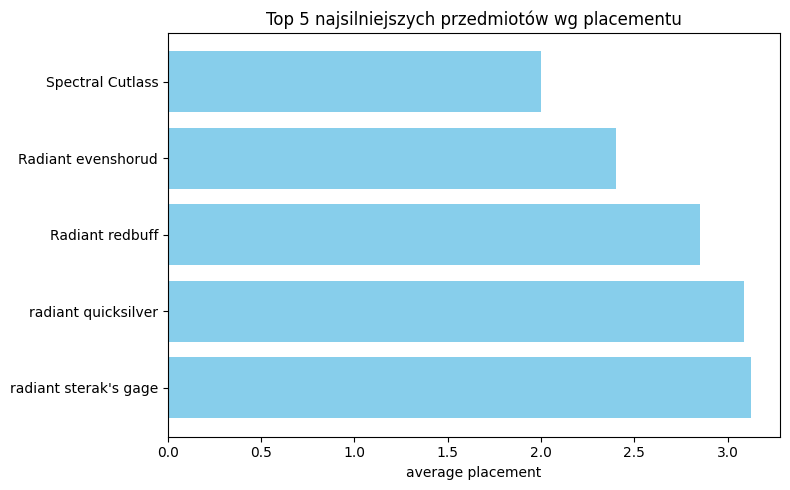

In [210]:
# Sortuj i wybierz top 5
top5 = placement_df.sort_values(by='placement').head(5)
names =["Spectral Cutlass", "Radiant evenshorud", "Radiant redbuff", "radiant quicksilver", "radiant sterak's gage"]

# Rysuj wykres poziomy
plt.figure(figsize=(8, 5))
plt.barh(names, top5['placement'], color='skyblue')
plt.xlabel('average placement')
plt.title('Top 5 najsilniejszych przedmiotów wg placementu')
plt.gca().invert_yaxis()  # Najlepszy na górze
plt.tight_layout()
plt.show()

In [212]:
import plotly.express as px

In [218]:
top5 = placement_df.sort_values(by='placement').head(5)

# Wykres
fig = px.bar(
    top5,
    x='placement',
    y='item_id',
    orientation='h',
    text='placement',
    color='placement',
    color_continuous_scale='Blues_r',
    title='Top 5 najsilniejszych przedmiotów (Plotly)'
)

fig.update_layout(
    xaxis_title="Średni placement (niżej = lepiej)",
    yaxis_title="",
    yaxis=dict(autorange='reversed')  # Najlepszy item na górze
)
fig.write_html("top5_plot.html")